# Market Analysis

Let's do a deep dive on one specific market, in this case Cape Coral, Florida. 

Cape Coral has been a hot market due to an influx of listing activity and declining home prices. Let's get into the lab and 
take a peak at whats going on. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

## Table of Contents

### [Market Overview](#market)
- Housing Stock/Mix Analysis
- Percent of Overall Market Owned by Investors
- Market Overview: Percent of all units that are rentals
- Who owns the homes? Size of investors in the market

### [Listing Overview](#listings)
- New listings analysis
- Of listings, what share do investors account for?

### [Prices Overview](#prices)
- Rental Prices
- New Listing for Sale Prices
- Purchase Prices

In [1]:
import os

import pandas as pd
import plotly.express as px
from parcllabs import ParclLabsClient

api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
client = ParclLabsClient(api_key=api_key)

In [50]:
# lets find cape coral metro (i.e. CBSA)

results = client.search_markets.retrieve(
    query='Tampa',
    # location_type='COUNTRY',
    location_type='CBSA',
    as_dataframe=True
)

results

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900417,USA,45300,None,"Tampa-St. Petersburg-Clearwater, Fl",None,None,CBSA


In [51]:
# we will use the cape coral parcl id of 2899822 throughout the rest of our analysis
analysis_parcl_id = results.iloc[0]['parcl_id']
name = results.iloc[0]['name']

print(f"In this analysis, we are studying: {name} which has parcl id: {analysis_parcl_id}")

In this analysis, we are studying: Tampa-St. Petersburg-Clearwater, Fl which has parcl id: 2900417


<a id='market'></a>
#### Market Overview

Let's review housing stock mix, percent of housing stock owned by investors, and percent of all units that are rentals

In [7]:
housing_stock = client.market_metrics_housing_stock.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 100
    },
    as_dataframe=True # make life easy on ourselves
)

housing_stock

,date,single_family,condo,townhouse,other,all_properties,parcl_id
0,2024-03-01,82094446,15363347,3345480,24031792,124835065,5826765
1,2024-02-01,82084516,15356722,3343449,24021607,124806294,5826765
2,2024-01-01,82074848,15350385,3341469,24012920,124779622,5826765
3,2023-12-01,82065566,15344376,3339856,24003559,124753357,5826765
4,2023-11-01,82058403,15339245,3338465,23996727,124732840,5826765
...,...,...,...,...,...,...,...
58,2019-05-01,80744606,15024873,3184057,23857939,122811475,5826765
59,2019-04-01,80715609,15022926,3181607,23856852,122776994,5826765
60,2019-03-01,80689058,15021304,3179502,23855801,122745665,5826765
61,2019-02-01,80666763,15019777,3177926,23854824,122719290,5826765


In [8]:
housing_stock['pct_condo'] = housing_stock['condo']/housing_stock['all_properties']
housing_stock['pct_townhouse'] = housing_stock['townhouse']/housing_stock['all_properties']

housing_stock

,date,single_family,condo,townhouse,other,all_properties,parcl_id,pct_condo,pct_townhouse
0,2024-03-01,82094446,15363347,3345480,24031792,124835065,5826765,0.123069,0.026799
1,2024-02-01,82084516,15356722,3343449,24021607,124806294,5826765,0.123044,0.026789
2,2024-01-01,82074848,15350385,3341469,24012920,124779622,5826765,0.123020,0.026779
3,2023-12-01,82065566,15344376,3339856,24003559,124753357,5826765,0.122998,0.026772
4,2023-11-01,82058403,15339245,3338465,23996727,124732840,5826765,0.122977,0.026765
...,...,...,...,...,...,...,...,...,...
58,2019-05-01,80744606,15024873,3184057,23857939,122811475,5826765,0.122341,0.025926
59,2019-04-01,80715609,15022926,3181607,23856852,122776994,5826765,0.122359,0.025914
60,2019-03-01,80689058,15021304,3179502,23855801,122745665,5826765,0.122377,0.025903
61,2019-02-01,80666763,15019777,3177926,23854824,122719290,5826765,0.122391,0.025896


In [9]:
# Let's analyze how the percent of single family homes as a proportion of the overall housing stock has changed
# since 2019

housing_stock['pct_single_family'] = housing_stock['single_family']/housing_stock['all_properties']

In [54]:
labs_logo_lookup = {
    'blue': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png',
    'white': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api-logo-white.png'
}

# set charting constants
labs_logo_dict = dict(
        source=labs_logo_lookup['white'],
        xref="paper",
        yref="paper",
        x=0.5,  # Centering the logo below the title
        y=1.02,  # Adjust this value to position the logo just below the title
        sizex=0.15, 
        sizey=0.15,
        xanchor="center",
        yanchor="bottom"
)

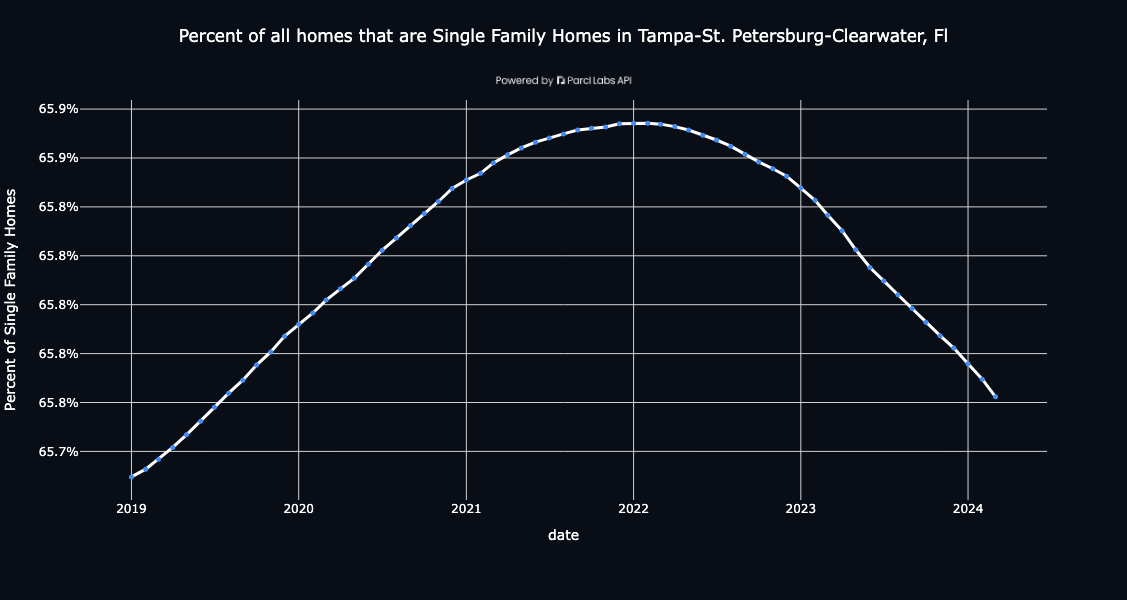

In [55]:
# Creating the line chart
fig = px.line(
    housing_stock, 
    x='date', 
    y='pct_single_family', 
    title=f'Percent of all homes that are Single Family Homes in {name}',
    labels={'pct_single_family': 'Percent of Single Family Homes'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".1%")

# Show the plot
fig.show()

In [56]:
# Now lets find out how much of this is owned by investors
investor_ownership = client.investor_metrics_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 200,
    },
    as_dataframe=True
)

# for graph formatting, divide pct_ownership by 100 since plotly handles this internally
investor_ownership['pct_ownership'] = investor_ownership['pct_ownership']/100

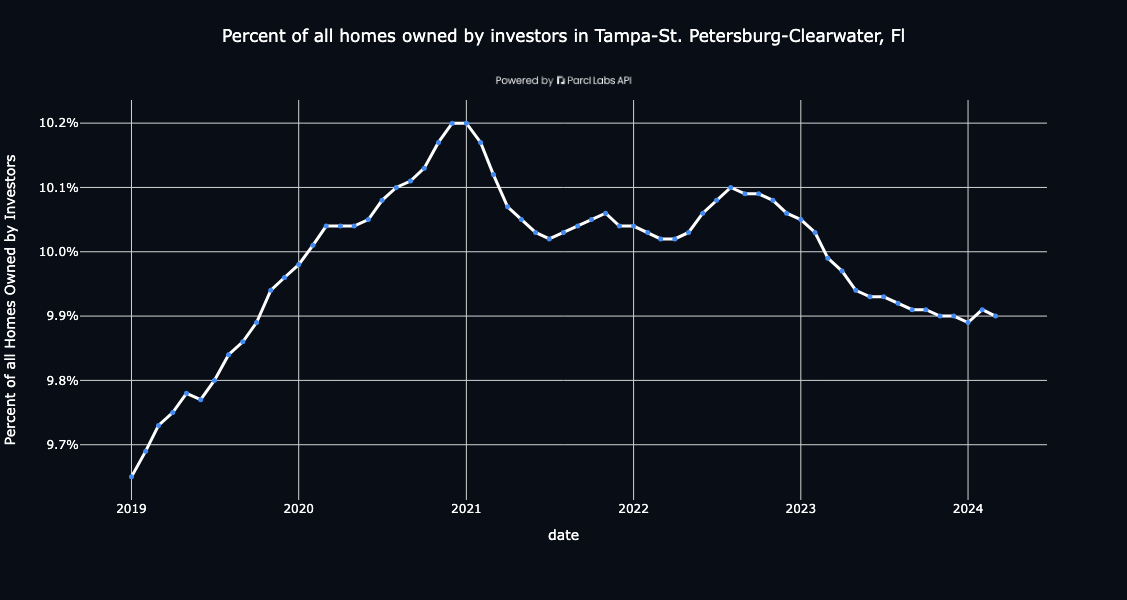

In [73]:
# Creating the line chart
fig = px.line(
    investor_ownership, 
    x='date', 
    y='pct_ownership', 
    title=f'Percent of all homes owned by investors in {name}',
    labels={'pct_ownership': 'Percent of all Homes Owned by Investors'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".1%") 

# Show the plot
fig.show()

In [74]:
# How big are the investors? Let's find out
portfolio_size_ownership = client.portfolio_metrics_sf_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True
)

portfolio_size_ownership

,date,count_portfolio_2_to_9,count_portfolio_10_to_99,count_portfolio_100_to_999,count_portfolio_1000_plus,count_all_portfolios,pct_sf_housing_stock_portfolio_2_to_9,pct_sf_housing_stock_portfolio_10_to_99,pct_sf_housing_stock_portfolio_100_to_999,pct_sf_housing_stock_portfolio_1000_plus,pct_sf_housing_stock_all_portfolios,parcl_id
0,2024-03-01,70818,11693,2048,23881,108440,8.45,1.4,0.24,2.85,12.94,2900417


In [80]:
# lets focus on the percentages
pso_pcts = portfolio_size_ownership[[
    'date', 
    'pct_sf_housing_stock_portfolio_2_to_9', 
    'pct_sf_housing_stock_portfolio_10_to_99', 
    'pct_sf_housing_stock_portfolio_100_to_999',
    'pct_sf_housing_stock_portfolio_1000_plus',
    'pct_sf_housing_stock_all_portfolios'
]]

pso_pcts_long = pso_pcts.melt(id_vars=['date'], var_name='category', value_name='percentage')
pso_pcts_long['percentage'] = pso_pcts_long['percentage']/100

# rename to friendly labels
friendly_labels = {
    'pct_sf_housing_stock_portfolio_2_to_9': 'Investor Portfolio (2 to 9 Units)', 
    'pct_sf_housing_stock_portfolio_10_to_99': 'Investor Portfolio (10 to 99 Units)', 
    'pct_sf_housing_stock_portfolio_100_to_999': 'Investor Portfolio (100 to 999 Units)',
    'pct_sf_housing_stock_portfolio_1000_plus': 'Investor Portfolio (1000+ Units)',
    'pct_sf_housing_stock_all_portfolios': 'Investor Portfolio (All Sizes)'
}

pso_pcts_long['category'] = pso_pcts_long['category'].replace(friendly_labels)
pso_pcts_long

,date,category,percentage
0,2024-03-01,Investor Portfolio (2 to 9 Units),0.0845
1,2024-03-01,Investor Portfolio (10 to 99 Units),0.0140
2,2024-03-01,Investor Portfolio (100 to 999 Units),0.0024
3,2024-03-01,Investor Portfolio (1000+ Units),0.0285
4,2024-03-01,Investor Portfolio (All Sizes),0.1294


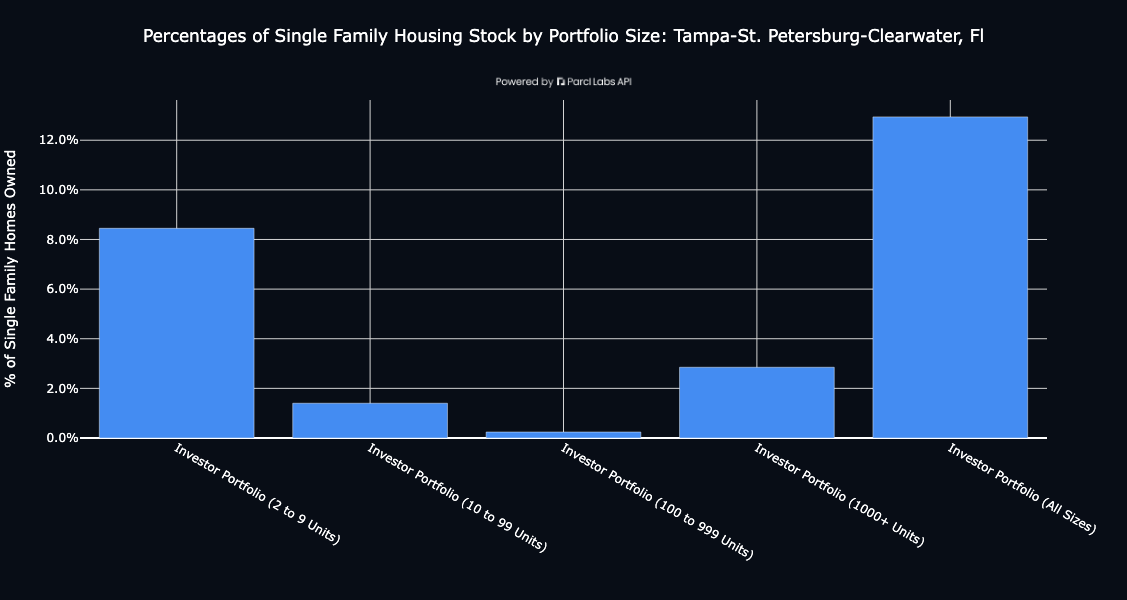

In [81]:
fig = px.bar(
    pso_pcts_long,
    x='category',
    y='percentage',
    title=f'Percentages of Single Family Housing Stock by Portfolio Size: {name}',
    labels={'percentage': '% of Single Family Homes Owned', 'category': 'Portfolio Size'},
    color_discrete_sequence=['#448CF2']  # Sets the color of the bars
)

# Adding layout image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)' 
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
)

# Removing x-axis title as requested in previous query
fig.update_layout(xaxis_title="")
fig.update_yaxes(tickformat=".1%") 

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()


In [82]:
# now lets find out what percent of all homes are rental units

rental_unit_concentration = client.rental_market_metrics_rental_units_concentration.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 200
    },
    as_dataframe=True
)

# for graph formatting, divide pct_rental_concentration by 100 since plotly handles this internally
rental_unit_concentration['pct_rental_concentration'] = rental_unit_concentration['pct_rental_concentration']/100

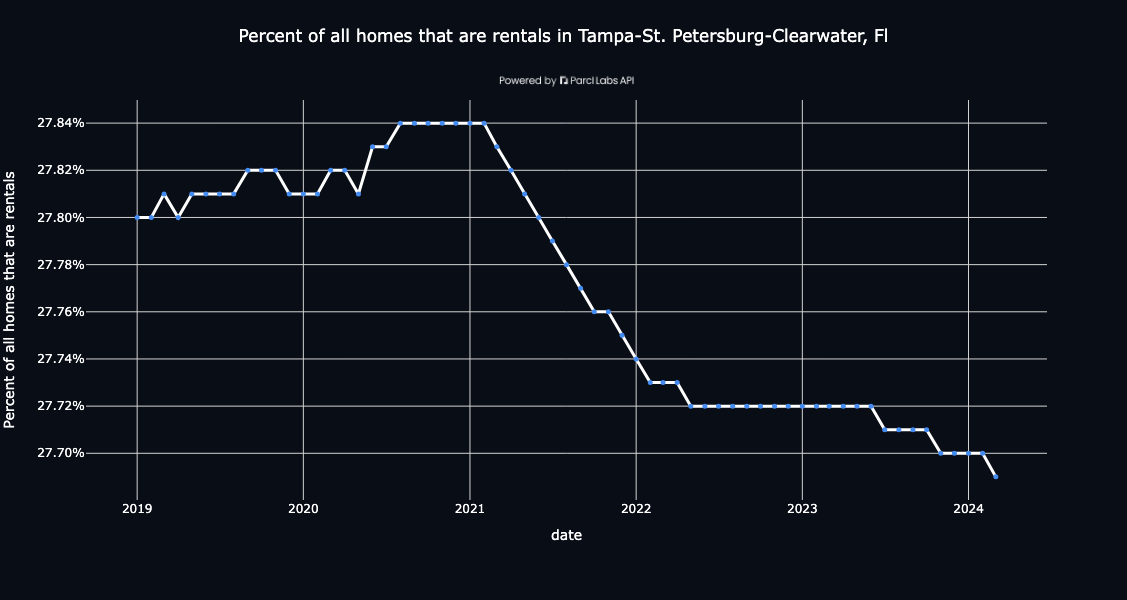

In [83]:
# Creating the line chart
fig = px.line(
    rental_unit_concentration, 
    x='date', 
    y='pct_rental_concentration', 
    title=f'Percent of all homes that are rentals in {name}',
    labels={'pct_rental_concentration': 'Percent of all homes that are rentals'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16', 
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".2%")  # Formats as percentage with one decimal place

# Show the plot
fig.show()

<a id='listings'></a>
#### New Listings Analysis
Capture the change in new listings on a 7, 30, 60 and 90 day basis

In [84]:
# first order of business, lets see how new listings have changed over the last year
start_date = '2021-01-01'

new_listings = client.for_sale_market_metrics_new_listings_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 300
    }
)
new_listings.tail()

,date,rolling_7_day,rolling_30_day,rolling_60_day,rolling_90_day,parcl_id
168,2021-02-01,369,1502,2549,3796,2900417
169,2021-01-25,365,1347,2403,3739,2900417
170,2021-01-18,374,1178,2352,3665,2900417
171,2021-01-11,357,1079,2253,3604,2900417
172,2021-01-04,213,980,2235,3578,2900417


In [85]:
new_listings_long = pd.melt(
    new_listings, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['rolling_30_day', 'rolling_60_day', 'rolling_90_day'],
    value_name='Number of New Listings',
    var_name='Rolling Window (Days)'
)

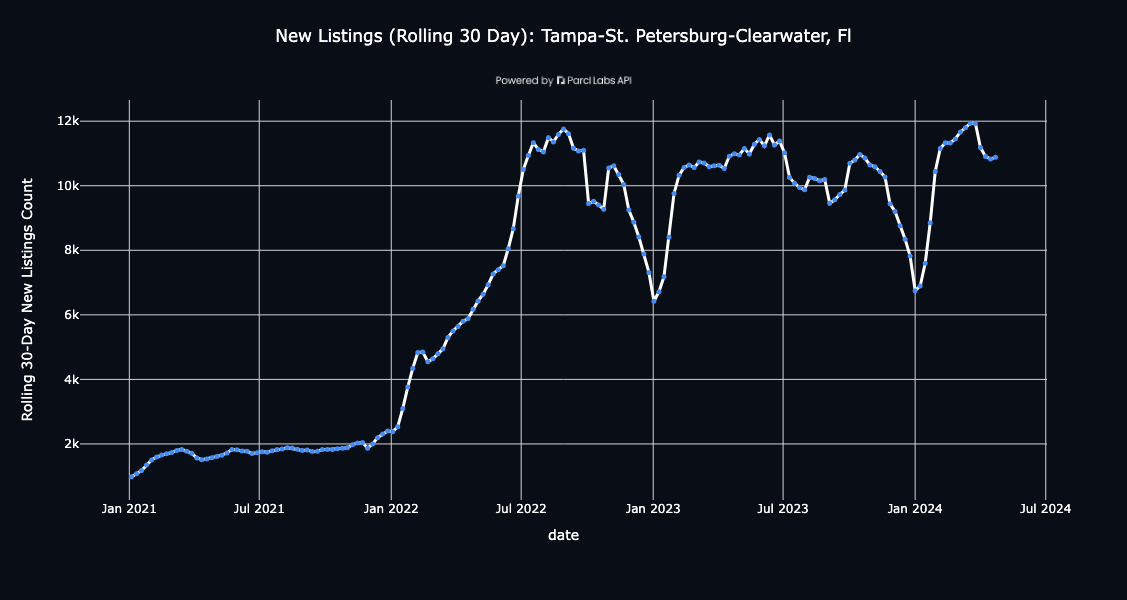

In [86]:
# Creating the line chart
fig = px.line(
    new_listings, 
    x='date', 
    y='rolling_30_day', 
    title=f'New Listings (Rolling 30 Day): {name}',
    labels={'rolling_30_day': 'Rolling 30-Day New Listings Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5) 
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

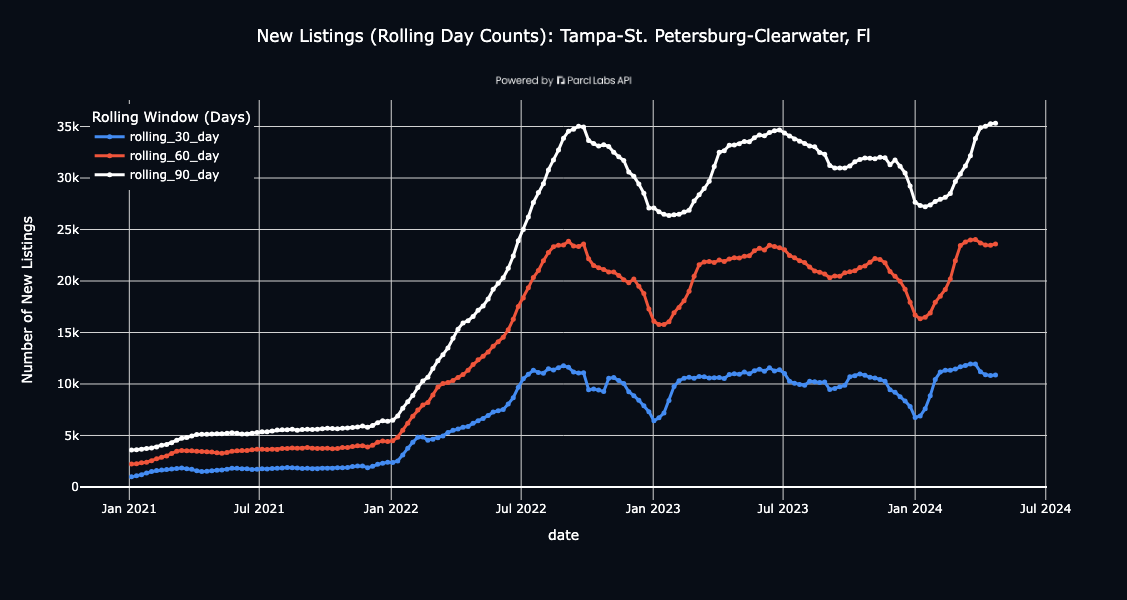

In [87]:
# Creating the line chart
fig = px.line(
    new_listings_long,
    x='date',
    y='Number of New Listings',
    color='Rolling Window (Days)',
    title=f'New Listings (Rolling Day Counts): {name}',
    labels={'count': 'Rolling Day Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

In [88]:
# of listings on the market, what percent of them are coming from investors?

investor_listings = client.investor_metrics_new_listings_for_sale_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 300
    },
    as_dataframe=True
)

investor_listings['pct_for_sale_market'] = investor_listings['pct_for_sale_market']/100
investor_listings.head(4)

,date,period,counts,pct_for_sale_market,parcl_id
0,2024-04-22,rolling_7_day,293,0.1158,2900417
1,2024-04-22,rolling_30_day,1237,0.1137,2900417
2,2024-04-22,rolling_60_day,2693,0.1142,2900417
3,2024-04-22,rolling_90_day,4132,0.1170,2900417


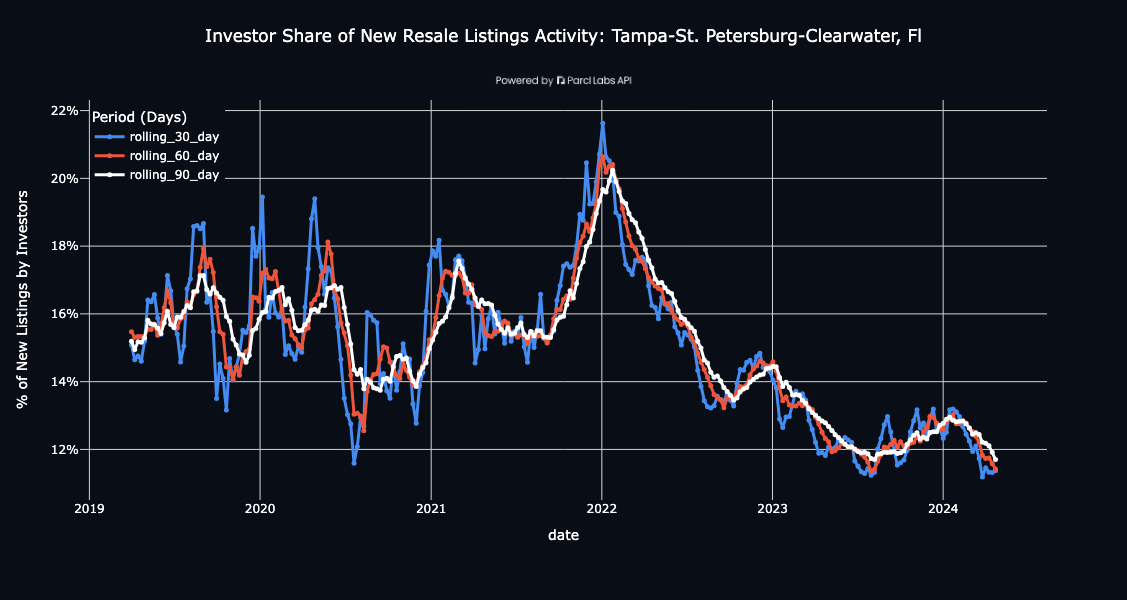

In [89]:
fig = px.line(
    investor_listings.loc[investor_listings['period'] != 'rolling_7_day'],
    x='date',
    y='pct_for_sale_market',
    color='period',  # This creates separate lines for each period
    title=f'Investor Share of New Resale Listings Activity: {name}',
    labels={'pct_for_sale_market': '% of New Listings by Investors'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Period (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date' 
)

fig.update_yaxes(tickformat=".0%")

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)


for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()


<a id='prices'></a>
### Price Activity

Let's review rental prices, new listing prices and home sales prices. 

In [90]:
# Prices
prices = client.market_metrics_housing_event_prices.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True,
    params={
        'limit': 300
    }
)

prices_long = prices[['date', 'parcl_id', 'price_median_sales', 'price_median_new_listings_for_sale']]

prices_long = pd.melt(
    prices_long, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['price_median_sales', 'price_median_new_listings_for_sale'],
    value_name='Median Price ($)',
    var_name='Transaction Type'
)

r = {
    'price_median_sales': 'Median Sales Price',
    'price_median_new_listings_for_sale': 'Median New Listing Price'
}

prices_long['Transaction Type'] = prices_long['Transaction Type'].replace(r)

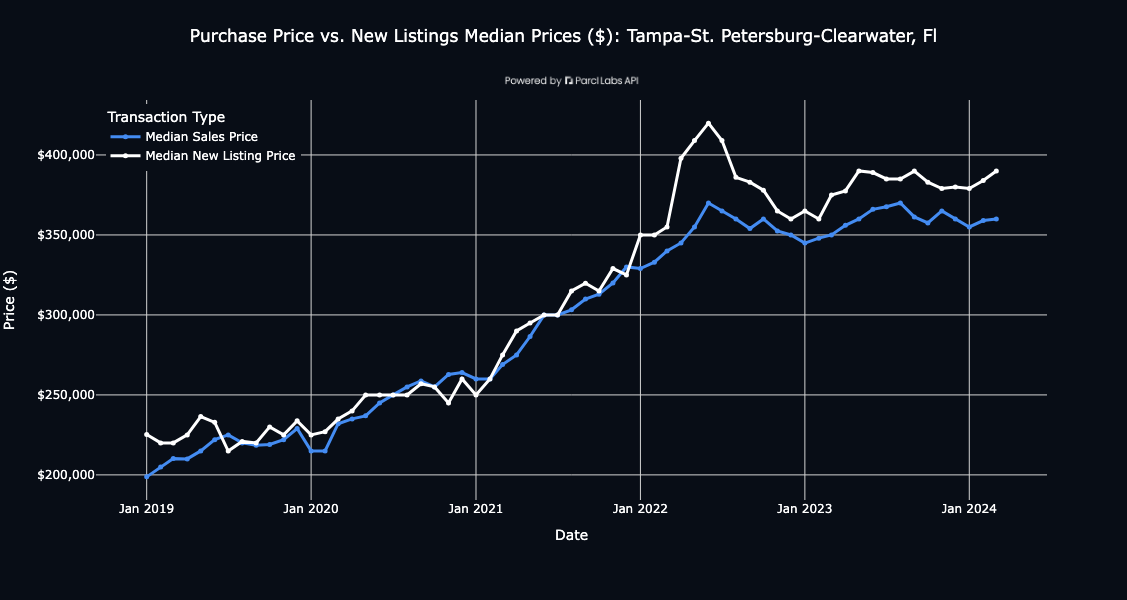

In [91]:
# Creating the line chart
fig = px.line(
    prices_long,
    x='date',
    y='Median Price ($)',
    color='Transaction Type',
    title=f'Purchase Price vs. New Listings Median Prices ($): {name}',
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,', 
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True, 
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

color_map = {
    'Median Sales Price': '#448CF2',
    'Median New Listing Price': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

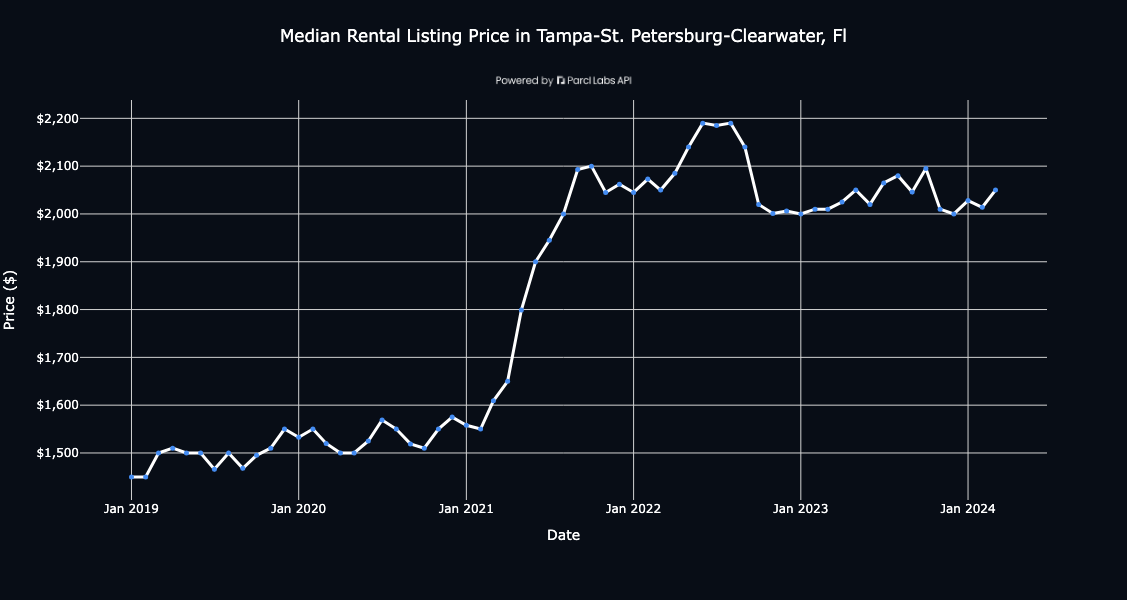

In [71]:
fig = px.line(
    prices, 
    x='date', 
    y='price_median_new_rental_listings', 
    title=f'Median Rental Listing Price in {name}',  # Add city or location in title if needed
    labels={'price_median_new_rental_listings': 'Asking Rental Price ($)'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

# Adding layout image
fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,',
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()
